In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from importlib import reload

import acquire as a 
import prepare as p
import explore as e

from scipy import stats

In [2]:
df = a.acquire_readmes()

In [3]:
df = p.prep_df_for_nlp(df,'readme_contents',extra_words=p.EXTRA_WORDS)

In [4]:
train, validate, test = p.split_data(df, 'language')

## Does the length of the README indicate the main programming language?

In [5]:
pd.DataFrame(train.groupby('language').lemmatized_len.mean())

,lemmatized_len
language,
Go,8745.078947
Java,4953.918919
JavaScript,11525.223404
Not Listed,27658.682927
Other,8245.333333
Python,14422.543478
TypeScript,6401.800000


In [22]:
import seaborn as sns

<AxesSubplot:xlabel='language', ylabel='lemmatized_len'>

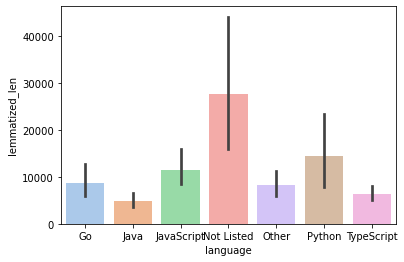

In [23]:
sns.barplot(x="language", y="lemmatized_len", data=train, palette='pastel')

In [6]:
go = train[train.language == 'Go'].lemmatized_len

In [7]:
stats.ttest_1samp(go, train.lemmatized_len.mean())

Ttest_1sampResult(statistic=-1.2539594676732875, pvalue=0.21772171611758417)

In [8]:
java = train[train.language == 'Java'].lemmatized_len

In [9]:
stats.ttest_1samp(java, train.lemmatized_len.mean())

Ttest_1sampResult(statistic=-8.125683633984549, pvalue=1.1636706744471063e-09)

In [11]:
javascript = train[train.language == 'JavaScript'].lemmatized_len

In [12]:
stats.ttest_1samp(javascript, train.lemmatized_len.mean())

Ttest_1sampResult(statistic=0.2734059259347175, pvalue=0.785147453154522)

In [13]:
not_listed = train[train.language == 'Not Listed'].lemmatized_len

In [14]:
stats.ttest_1samp(not_listed, train.lemmatized_len.mean())

Ttest_1sampResult(statistic=2.297361211476212, pvalue=0.026909338630790387)

In [16]:
other = train[train.language == 'Other'].lemmatized_len

In [17]:
stats.ttest_1samp(other, train.lemmatized_len.mean())

Ttest_1sampResult(statistic=-1.9151061194929244, pvalue=0.057434377111973266)

In [18]:
python = train[train.language == 'Python'].lemmatized_len

In [19]:
stats.ttest_1samp(python, train.lemmatized_len.mean())

Ttest_1sampResult(statistic=0.8268888048789708, pvalue=0.41266335058727943)

In [20]:
typescript = train[train.language == 'TypeScript'].lemmatized_len

In [21]:
stats.ttest_1samp(typescript, train.lemmatized_len.mean())

Ttest_1sampResult(statistic=-5.407237667455391, pvalue=3.4411756416892293e-06)

In [25]:
stat, p = stats.kruskal(go, java, javascript, not_listed, other, python, typescript)

In [27]:
e.p_to_md(p)

## Because $\alpha$ > p,we  reject $H_0$